In [4]:
#import modules
import pandas as pd
import numpy as np

#viz
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import FCPython 
from mplsoccer import Pitch, VerticalPitch
from mplsoccer.utils import FontManager
from highlight_text import HighlightText, ax_text, fig_text

#stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
df = pd.read_csv("../Datasets/matchID_plEventsData.csv")
df.head()

C:\Users\User\anaconda3\envs\mplsoccer\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (12,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,no,matchID,id,eventId,minute,second,teamId,x,y,expandedMinute,...,isShot,blockedX,blockedY,cardType_value,cardType_displayName,isGoal,name,position,shirtNo,isOwnGoal
0,0.0,1.0,2.253487e+09,2.0,0.0,0.0,Manchester United,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,2.253487e+09,1000003.0,0.0,0.0,Burnley,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1.0,2.253488e+09,1000004.0,0.0,0.0,Burnley,50.3,50.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Ashley Westwood,MC,18.0,NaN
3,3.0,1.0,2.253488e+09,1000005.0,0.0,2.0,Burnley,29.6,53.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,James Tarkowski,DC,5.0,NaN
4,4.0,1.0,2.253488e+09,1000006.0,0.0,7.0,Burnley,41.3,18.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Matthew Lowton,DR,2.0,NaN


In [6]:
df.drop(['no'], axis = 1, inplace = True)
df['id'] = df['id'].astype('Int64')
df['eventId'] = df['eventId'].astype('Int64')
df.dtypes

matchID                 float64
id                        Int64
eventId                   Int64
minute                  float64
second                  float64
teamId                   object
x                       float64
y                       float64
expandedMinute          float64
qualifiers               object
satisfiedEventsTypes     object
isTouch                  object
period_value            float64
period_displayName       object
type_value              float64
type                     object
outcomeType_value       float64
outcomeType              object
playerId                float64
endX                    float64
endY                    float64
relatedEventId          float64
relatedPlayerId         float64
goalMouthZ              float64
goalMouthY              float64
isShot                   object
blockedX                float64
blockedY                float64
cardType_value          float64
cardType_displayName     object
isGoal                   object
name    

In [7]:
df.type.unique()

array(['Start', 'Pass', 'MissedShots', 'Interception', 'BallTouch',
       'BallRecovery', 'TakeOn', 'Tackle', 'BlockedPass', 'Foul',
       'Dispossessed', 'SavedShot', 'Save', 'Aerial', 'Clearance',
       'KeeperPickup', 'OffsideGiven', 'OffsidePass', 'OffsideProvoked',
       'Challenge', 'CornerAwarded', 'Card', 'End', 'SubstitutionOff',
       'SubstitutionOn', 'Goal', 'FormationChange', 'FormationSet',
       'Claim', 'KeeperSweeper', 'ShotOnPost', 'ChanceMissed',
       'PenaltyFaced', 'Smother', 'ShieldBallOpp', 'Punch', 'Error',
       'CrossNotClaimed', 'GoodSkill', nan], dtype=object)

In [8]:
all_shot_df = df.loc[df['isShot'] == 1]
all_shot_df

,matchID,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,...,isShot,blockedX,blockedY,cardType_value,cardType_displayName,isGoal,name,position,shirtNo,isOwnGoal
5,1.0,2253487689,1000007,0.0,11.0,Burnley,86.0,73.1,0.0,"[{'type': {'value': 55, 'displayName': 'Relate...",...,True,NaN,NaN,NaN,NaN,NaN,Robbie Brady,ML,12.0,NaN
53,1.0,2253489297,1000029,2.0,49.0,Burnley,77.8,34.9,2.0,"[{'type': {'value': 102, 'displayName': 'GoalM...",...,True,82.1,37.5,NaN,NaN,NaN,J??hann Gudmundsson,MR,7.0,NaN
178,1.0,2253492889,1000093,9.0,2.0,Burnley,77.1,65.1,9.0,"[{'type': {'value': 103, 'displayName': 'GoalM...",...,True,85.9,58.8,NaN,NaN,NaN,Robbie Brady,ML,12.0,NaN
232,1.0,2253494513,1000120,12.0,5.0,Burnley,73.2,60.3,12.0,"[{'type': {'value': 18, 'displayName': 'OutOfB...",...,True,NaN,NaN,NaN,NaN,NaN,Ben Mee,DC,6.0,NaN
285,1.0,2253496507,177,16.0,8.0,Manchester United,85.2,49.3,16.0,"[{'type': {'value': 102, 'displayName': 'GoalM...",...,True,98.2,49.5,NaN,NaN,NaN,Bruno Fernandes,AMC,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607393,380.0,2302272513,774,78.0,54.0,Wolves,73.5,56.5,84.0,"[{'type': {'value': 178, 'displayName': 'Stand...",...,True,NaN,NaN,NaN,NaN,NaN,R??ben Neves,MC,8.0,NaN
607419,380.0,2302273855,729,80.0,27.0,Manchester United,77.2,60.8,86.0,"[{'type': {'value': 146, 'displayName': 'Block...",...,True,98.4,51.1,NaN,NaN,NaN,Amad Diallo,FW,19.0,NaN
607451,380.0,2302275861,811,82.0,51.0,Wolves,86.4,45.2,88.0,"[{'type': {'value': 55, 'displayName': 'Relate...",...,True,98.5,48.7,NaN,NaN,NaN,Morgan Gibbs-White,Sub,18.0,NaN
607570,380.0,2302281475,887,90.0,48.0,Wolves,74.0,52.2,96.0,"[{'type': {'value': 55, 'displayName': 'Relate...",...,True,NaN,NaN,NaN,NaN,NaN,Morgan Gibbs-White,Sub,18.0,NaN


In [9]:
# Remove penalty shots (Outliers -> High xG)
all_shot_df['isPenalty'] = 0 # create a new column for Penalty
all_shot_df['qualifiers'] = all_shot_df['qualifiers'].astype('string') # convert all types to string
        
penalty_findings = all_shot_df['qualifiers'].str.contains('Penalty') # see if shots are penalties

all_shot_df['isPenalty'] = penalty_findings
all_shot_df['isPenalty'] = all_shot_df['isPenalty'].astype(int) # convert to int 0, 1

# Extract non penalty shots
nonpenalty_shot_df = all_shot_df.loc[all_shot_df['isPenalty'] == 0]
nonpenalty_shot_df

C:\Users\User\anaconda3\envs\mplsoccer\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\envs\mplsoccer\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\anaconda3\envs\mplsoccer\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,matchID,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,...,blockedX,blockedY,cardType_value,cardType_displayName,isGoal,name,position,shirtNo,isOwnGoal,isPenalty
5,1.0,2253487689,1000007,0.0,11.0,Burnley,86.0,73.1,0.0,"[{'type': {'value': 55, 'displayName': 'Relate...",...,NaN,NaN,NaN,NaN,NaN,Robbie Brady,ML,12.0,NaN,0
53,1.0,2253489297,1000029,2.0,49.0,Burnley,77.8,34.9,2.0,"[{'type': {'value': 102, 'displayName': 'GoalM...",...,82.1,37.5,NaN,NaN,NaN,J??hann Gudmundsson,MR,7.0,NaN,0
178,1.0,2253492889,1000093,9.0,2.0,Burnley,77.1,65.1,9.0,"[{'type': {'value': 103, 'displayName': 'GoalM...",...,85.9,58.8,NaN,NaN,NaN,Robbie Brady,ML,12.0,NaN,0
232,1.0,2253494513,1000120,12.0,5.0,Burnley,73.2,60.3,12.0,"[{'type': {'value': 18, 'displayName': 'OutOfB...",...,NaN,NaN,NaN,NaN,NaN,Ben Mee,DC,6.0,NaN,0
285,1.0,2253496507,177,16.0,8.0,Manchester United,85.2,49.3,16.0,"[{'type': {'value': 102, 'displayName': 'GoalM...",...,98.2,49.5,NaN,NaN,NaN,Bruno Fernandes,AMC,18.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607393,380.0,2302272513,774,78.0,54.0,Wolves,73.5,56.5,84.0,"[{'type': {'value': 178, 'displayName': 'Stand...",...,NaN,NaN,NaN,NaN,NaN,R??ben Neves,MC,8.0,NaN,0
607419,380.0,2302273855,729,80.0,27.0,Manchester United,77.2,60.8,86.0,"[{'type': {'value': 146, 'displayName': 'Block...",...,98.4,51.1,NaN,NaN,NaN,Amad Diallo,FW,19.0,NaN,0
607451,380.0,2302275861,811,82.0,51.0,Wolves,86.4,45.2,88.0,"[{'type': {'value': 55, 'displayName': 'Relate...",...,98.5,48.7,NaN,NaN,NaN,Morgan Gibbs-White,Sub,18.0,NaN,0
607570,380.0,2302281475,887,90.0,48.0,Wolves,74.0,52.2,96.0,"[{'type': {'value': 55, 'displayName': 'Relate...",...,NaN,NaN,NaN,NaN,NaN,Morgan Gibbs-White,Sub,18.0,NaN,0


In [10]:
# Extract data that are goals
goal_df = df.loc[df['isGoal'] == 1]
goal_df

,matchID,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,...,isShot,blockedX,blockedY,cardType_value,cardType_displayName,isGoal,name,position,shirtNo,isOwnGoal
1177,1.0,2253522047,768,70.0,8.0,Manchester United,84.0,54.0,75.0,"[{'type': {'value': 154, 'displayName': 'Inten...",...,True,NaN,NaN,NaN,NaN,True,Paul Pogba,DMC,6.0,NaN
2881,2.0,2255955729,855,78.0,38.0,Manchester City,82.2,48.8,80.0,"[{'type': {'value': 29, 'displayName': 'Assist...",...,True,NaN,NaN,NaN,NaN,True,Bernardo Silva,FW,20.0,NaN
3038,2.0,2255963331,942,89.0,42.0,Manchester City,88.5,50.0,91.0,"[{'type': {'value': 17, 'displayName': 'BoxCen...",...,True,NaN,NaN,NaN,NaN,True,Ilkay G??ndogan,MC,8.0,NaN
3321,3.0,2210321773,98,12.0,34.0,Crystal Palace,92.0,56.1,12.0,"[{'type': {'value': 102, 'displayName': 'GoalM...",...,True,NaN,NaN,NaN,NaN,True,Wilfried Zaha,FW,11.0,NaN
4861,4.0,2210246583,99,7.0,59.0,Arsenal,97.4,47.0,7.0,"[{'type': {'value': 22, 'displayName': 'Regula...",...,True,NaN,NaN,NaN,NaN,True,Alexandre Lacazette,FW,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605111,379.0,2302238077,294,32.0,27.0,West Ham United,90.0,43.1,32.0,"[{'type': {'value': 56, 'displayName': 'Zone'}...",...,True,NaN,NaN,NaN,NaN,True,Pablo Fornals,AML,18.0,NaN
605909,379.0,2302274889,644,85.0,16.0,West Ham United,91.5,63.3,87.0,"[{'type': {'value': 56, 'displayName': 'Zone'}...",...,True,NaN,NaN,NaN,NaN,True,Declan Rice,DMC,41.0,NaN
606256,380.0,2302222831,111,12.0,19.0,Manchester United,92.7,49.0,12.0,"[{'type': {'value': 76, 'displayName': 'LowLef...",...,True,NaN,NaN,NaN,NaN,True,Anthony Elanga,AMR,56.0,NaN
606646,380.0,2302241017,346,38.0,40.0,Wolves,93.2,45.5,38.0,"[{'type': {'value': 29, 'displayName': 'Assist...",...,True,NaN,NaN,NaN,NaN,True,N??lson Semedo,DMR,22.0,NaN


In [11]:
# Check if goal count matches
df['type'].astype(str)
goal_type = df.loc[df['type'] == 'Goal']
len(goal_type)

1024

In [12]:
## Data Pre-processing / Cleaning
# Extract necessary columns for shots data (distance)
# Create a dataframe for non-penalty shots for xG model training
shot_df = nonpenalty_shot_df.filter(['matchID','name','teamId','x','y','goalMouthZ','goalMouthY','type','isShot','isGoal','isOwnGoal'], axis = 1)
# Create a dataframe for all shots for xG input
all_shots_df = all_shot_df.filter(['matchID','name','teamId','x','y','goalMouthZ','goalMouthY','type','isShot','isGoal','isOwnGoal'], axis = 1)

# Convert data types 
shot_df['name'] = shot_df['name'].astype(str)
shot_df['teamId'] = shot_df['teamId'].astype(str)
shot_df['type'] = shot_df['type'].astype(str)

shot_df['isShot'] = shot_df['isShot'].fillna(0)
shot_df['isGoal'] = shot_df['isGoal'].fillna(0)

# Remove own goals (not counted)
shot_df = shot_df.drop(shot_df[shot_df['isOwnGoal'] == 1].index)
all_shots_df = all_shots_df.drop(all_shots_df[all_shots_df['isOwnGoal'] == 1].index)

shot_df

,matchID,name,teamId,x,y,goalMouthZ,goalMouthY,type,isShot,isGoal,isOwnGoal
5,1.0,Robbie Brady,Burnley,86.0,73.1,75.0,57.1,MissedShots,True,0,NaN
53,1.0,J??hann Gudmundsson,Burnley,77.8,34.9,19.0,48.4,SavedShot,True,0,NaN
178,1.0,Robbie Brady,Burnley,77.1,65.1,19.0,48.8,SavedShot,True,0,NaN
232,1.0,Ben Mee,Burnley,73.2,60.3,36.1,68.7,MissedShots,True,0,NaN
285,1.0,Bruno Fernandes,Manchester United,85.2,49.3,23.4,49.5,SavedShot,True,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
607393,380.0,R??ben Neves,Wolves,73.5,56.5,8.3,59.3,MissedShots,True,0,NaN
607419,380.0,Amad Diallo,Manchester United,77.2,60.8,6.3,47.0,SavedShot,True,0,NaN
607451,380.0,Morgan Gibbs-White,Wolves,86.4,45.2,29.1,47.2,SavedShot,True,0,NaN
607570,380.0,Morgan Gibbs-White,Wolves,74.0,52.2,6.9,58.7,MissedShots,True,0,NaN


In [13]:
all_shots_df

,matchID,name,teamId,x,y,goalMouthZ,goalMouthY,type,isShot,isGoal,isOwnGoal
5,1.0,Robbie Brady,Burnley,86.0,73.1,75.0,57.1,MissedShots,True,NaN,NaN
53,1.0,J??hann Gudmundsson,Burnley,77.8,34.9,19.0,48.4,SavedShot,True,NaN,NaN
178,1.0,Robbie Brady,Burnley,77.1,65.1,19.0,48.8,SavedShot,True,NaN,NaN
232,1.0,Ben Mee,Burnley,73.2,60.3,36.1,68.7,MissedShots,True,NaN,NaN
285,1.0,Bruno Fernandes,Manchester United,85.2,49.3,23.4,49.5,SavedShot,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
607393,380.0,R??ben Neves,Wolves,73.5,56.5,8.3,59.3,MissedShots,True,NaN,NaN
607419,380.0,Amad Diallo,Manchester United,77.2,60.8,6.3,47.0,SavedShot,True,NaN,NaN
607451,380.0,Morgan Gibbs-White,Wolves,86.4,45.2,29.1,47.2,SavedShot,True,NaN,NaN
607570,380.0,Morgan Gibbs-White,Wolves,74.0,52.2,6.9,58.7,MissedShots,True,NaN,NaN


In [14]:
shots_model=pd.DataFrame(columns=['matchID','Goal','X','Y','C','Angle'])
shots_model

,matchID,Goal,X,Y,C,Angle


In [15]:
all_shots_model=pd.DataFrame(columns=['matchID','teamID','Goal','X','Y','C','Angle'])
all_shots_model

,matchID,teamID,Goal,X,Y,C,Angle


In [16]:
for i, shottags in shot_df.iterrows():
    shots_model.at[i,'matchID']=shot_df.at[i,'matchID']
    shots_model.at[i,'X']=100-shot_df.at[i,'x']
    shots_model.at[i,'Y']=shot_df.at[i,'y']
    shots_model.at[i,'C']=abs(shot_df.at[i,'y']-50)
    
    #Distance in metres and shot angle in radians.
    x=shots_model.at[i,'X']*105/100
    y=shots_model.at[i,'C']*65/100
    shots_model.at[i,'Distance'] = np.sqrt(x**2 + y**2)
    a = np.arctan(7.32 *x /(x**2 + y**2 - (7.32/2)**2))
    if a<0:
        a=np.pi+a
    shots_model.at[i,'Angle'] = a
    
    #Check whether it results in a goal
    shots_model.at[i,'Goal'] = 0
    #Tags contain that its a goal
    if shot_df.at[i,'isGoal'] == 1:
            shots_model.at[i,'Goal'] = 1


In [17]:
for i, shottags in all_shots_df.iterrows():
    all_shots_model.at[i,'matchID']=all_shots_df.at[i,'matchID']
    all_shots_model.at[i,'teamID']=all_shots_df.at[i,'teamId']
    all_shots_model.at[i,'X']=100-all_shots_df.at[i,'x']
    all_shots_model.at[i,'Y']=all_shots_df.at[i,'y']
    all_shots_model.at[i,'C']=abs(all_shots_df.at[i,'y']-50)
    
    #Distance in metres and shot angle in radians.
    x=all_shots_model.at[i,'X']*105/100
    y=all_shots_model.at[i,'C']*65/100
    all_shots_model.at[i,'Distance'] = np.sqrt(x**2 + y**2)
    a = np.arctan(7.32 *x /(x**2 + y**2 - (7.32/2)**2))
    if a<0:
        a=np.pi+a
    all_shots_model.at[i,'Angle'] = a
    
    #Check whether it results in a goal
    all_shots_model.at[i,'Goal'] = 0
    #Tags contain that its a goal
    if all_shots_df.at[i,'isGoal'] == 1:
            all_shots_model.at[i,'Goal'] = 1

In [18]:
shots_model

,matchID,Goal,X,Y,C,Angle,Distance
5,1,0,14,73.1,23.1,0.246227,21.012859
53,1,0,22.2,34.9,15.1,0.265987,25.292100
178,1,0,22.9,65.1,15.1,0.260201,25.971066
232,1,0,26.8,60.3,10.3,0.245165,28.925467
285,1,0,14.8,49.3,0.7,0.462249,15.546660
...,...,...,...,...,...,...,...
607393,380,0,26.5,56.5,6.5,0.255836,28.143938
607419,380,0,22.8,60.8,10.8,0.280179,24.948026
607451,380,0,13.6,45.2,4.8,0.481074,14.616867
607570,380,0,26,52.2,2.2,0.265834,27.337427


In [19]:
all_shots_model

,matchID,teamID,Goal,X,Y,C,Angle,Distance
5,1,Burnley,0,14,73.1,23.1,0.246227,21.012859
53,1,Burnley,0,22.2,34.9,15.1,0.265987,25.292100
178,1,Burnley,0,22.9,65.1,15.1,0.260201,25.971066
232,1,Burnley,0,26.8,60.3,10.3,0.245165,28.925467
285,1,Manchester United,0,14.8,49.3,0.7,0.462249,15.546660
...,...,...,...,...,...,...,...,...
607393,380,Wolves,0,26.5,56.5,6.5,0.255836,28.143938
607419,380,Manchester United,0,22.8,60.8,10.8,0.280179,24.948026
607451,380,Wolves,0,13.6,45.2,4.8,0.481074,14.616867
607570,380,Wolves,0,26,52.2,2.2,0.265834,27.337427


In [20]:
#Create a 2D histogram
H_Shot=np.histogram2d(shots_model['X'], shots_model['Y'],bins=50,range=[[0, 100],[0, 100]])
goals_only=shots_model[shots_model['Goal']==1]
H_Goal=np.histogram2d(goals_only['X'], goals_only['Y'],bins=50,range=[[0, 100],[0, 100]])

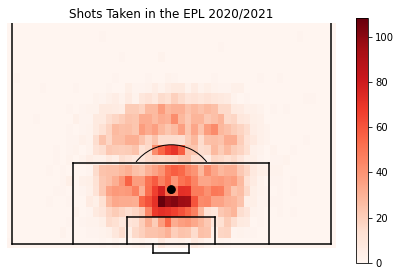

In [21]:
#Plot number of shots taken from all points
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Shots Taken in the EPL 2020/2021')
plt.xlim((-1,66))
plt.ylim((-3,45))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Save figure
fig.savefig('ShotsModel_Output/ShotsTaken.png', bbox_inches="tight")  

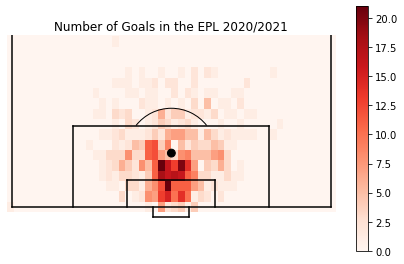

In [22]:
#Plot the number of goals from different points
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_Goal[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of Goals in the EPL 2020/2021')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Save figure
fig.savefig('ShotsModel_Output/GoalsScored.png', bbox_inches="tight")   

C:\Users\User\anaconda3\envs\mplsoccer\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


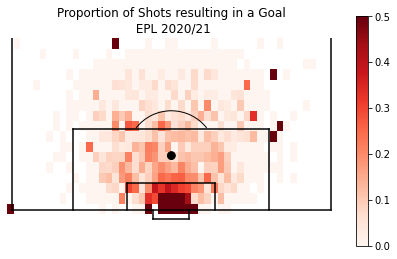

In [23]:
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('Proportion of Shots resulting in a Goal\n EPL 2020/21')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Save figure
fig.savefig('ShotsModel_Output/PropotionofShotGoal.png', bbox_inches="tight")    

In [24]:
# Save newly created dataframe into csv to train model
shots_model.to_csv('../Datasets/shots_model.csv', index=False)

In [25]:
# Save newly created dataframe into csv to calculate xG
all_shots_model.to_csv('../Datasets/all_shots_model.csv', index=False)